## Content

### <a href='#wrangle'>Data Wrangling</a>
<ul>
    <li><a href='#basics'>DF basics</a></li>
    <li><a href='#dtype'>Update DTypes</a></li>
    <li><a href='#symbols'>Checkout Stock Symbols</a></li>
    <li><a href='#unique'>Uniqueness Across Different DFs</a></li>
    <li><a href='#null'>Visualize Null Values with Heatmap</a></li>
    <li><a href='#drop'>Handle Null Values</a></li>
</ul>

### <a href='#explore'>Exploratory Data Analysis</a>
<ul>
    <li><a href='#sma'>Create Simple Moving Average columns 5day, 50day and 100day</a></li>
    <li><a href='#ema'>Create Exponential Moving Average columns</a></li>
    <li><a href='#rsi'>Create RSI columns</a></li>
    <li><a href='#visualize'>Visualize the New Columns VS Prices</a></li>
</ul>

### <span id='import'>Import</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv('./data/prices.csv')
securities = pd.read_csv('./data/securities.csv')
fundamentals = pd.read_csv('./data/fundamentals.csv', index_col=0)
prices_split = pd.read_csv('./data/prices-split-adjusted.csv')

## <span id='wrangle'>Data Wrangling</span>

### <span id='basics'>Explore DataFrames Basics</span>

In [3]:
from IPython.display import display

In [68]:
# print basics for each DF recursively by a custom function
# parameters are lists of dataframes and lists of desired methods 
def explore_all(df_dict, funcs):
    methods = ['dtypes', 'shape', 'columns','shape']
    for i, df in enumerate(df_dict.values()):
        name = list(DFs.keys())[i]
        print('_________________________________________________________________________________________________________')
        print('DataFrame Name: ',name)
        print('_________________________________________________________________________________________________________')
        print('_________________________________________________________________________________________________________')
        print('_________________________________________________________________________________________________________')
        for func in funcs:
            if func in methods:
                display(getattr(df, func))
                print('In ',name,' called^^^^Method: .{}'.format(func))
            else:
                display(getattr(df, func)())
                print('In ',name,' called^^^^Method: .{}()'.format(func))

        

In [69]:
# give dataframes a referencable name for naming later
DFs = {'prices':prices, 'prices_split':prices_split, 'fundamentals':fundamentals, 'securities':securities}

# methods to call on DFs
funcs = ['columns','head', 'dtypes','describe', 'shape']

# 
explore_all(DFs, funcs)

_________________________________________________________________________________________________________
DataFrame Name:  prices
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In  prices  called^^^^Method: .columns


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In  prices  called^^^^Method: .head()


date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In  prices  called^^^^Method: .dtypes


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In  prices  called^^^^Method: .describe()


(851264, 7)

In  prices  called^^^^Method: .shape
_________________________________________________________________________________________________________
DataFrame Name:  prices_split
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In  prices_split  called^^^^Method: .columns


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In  prices_split  called^^^^Method: .head()


date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In  prices_split  called^^^^Method: .dtypes


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In  prices_split  called^^^^Method: .describe()


(851264, 7)

In  prices_split  called^^^^Method: .shape
_________________________________________________________________________________________________________
DataFrame Name:  fundamentals
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

In  fundamentals  called^^^^Method: .columns


,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In  fundamentals  called^^^^Method: .head()


Ticker Symbol                           object
Period Ending                   datetime64[ns]
Accounts Payable                       float64
Accounts Receivable                    float64
Add'l income/expense items             float64
                                     ...      
Total Revenue                          float64
Treasury Stock                         float64
For Year                               float64
Earnings Per Share                     float64
Estimated Shares Outstanding           float64
Length: 78, dtype: object

In  fundamentals  called^^^^Method: .dtypes


,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,1.608543e+09,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,9.177636e+09,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,1.628000e+06,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,7.725000e+06,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,2.970000e+08,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,1.581420e+11,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In  fundamentals  called^^^^Method: .describe()


(1781, 78)

In  fundamentals  called^^^^Method: .shape
_________________________________________________________________________________________________________
DataFrame Name:  securities
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')

In  securities  called^^^^Method: .columns


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaT,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In  securities  called^^^^Method: .head()


Ticker symbol                      object
Security                           object
SEC filings                        object
GICS Sector                        object
GICS Sub Industry                  object
Address of Headquarters            object
Date first added           datetime64[ns]
CIK                                 int64
dtype: object

In  securities  called^^^^Method: .dtypes


,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In  securities  called^^^^Method: .describe()


(505, 8)

In  securities  called^^^^Method: .shape


#### <span id='dtype'>Change dates columns to datetime dtypes</span>

Some column dtypes reveal strange things. There are four columns to change from objects to datetimes. 


The 'date' columns in prices and prices_split as well as the 'Period Ending' column in fundamentals and the 'Date first added' column in securities should be converted from an object to a datetime. Let's do that next.

In [6]:
#function to change dtypes to datetime
def to_dt(names):
    changed_list = list()
    for df in DFs.values():
        for col in df:
            if col in names and df[col].dtypes == 'object':
                changed_list.append(col)
                df[col] = pd.to_datetime(df[col])
    print('Changed {} to datetime'.format(changed_list))

In [7]:
# all columns to change
to_dt_list = ['date', 'Period Ending', 'Date first added']

# execute change to datetime
to_dt(to_dt_list)

Changed ['date', 'date', 'Period Ending', 'Date first added'] to datetime


In [8]:
# check for appropriate changes
explore_all(DFs, ['dtypes'])

_________________________________________________________________________________________________________
prices
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

^^^^Method: .dtypes
_________________________________________________________________________________________________________
prices_split
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

^^^^Method: .dtypes
_________________________________________________________________________________________________________
fundamentals
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Ticker Symbol                           object
Period Ending                   datetime64[ns]
Accounts Payable                       float64
Accounts Receivable                    float64
Add'l income/expense items             float64
                                     ...      
Total Revenue                          float64
Treasury Stock                         float64
For Year                               float64
Earnings Per Share                     float64
Estimated Shares Outstanding           float64
Length: 78, dtype: object

^^^^Method: .dtypes
_________________________________________________________________________________________________________
securities
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Ticker symbol                      object
Security                           object
SEC filings                        object
GICS Sector                        object
GICS Sub Industry                  object
Address of Headquarters            object
Date first added           datetime64[ns]
CIK                                 int64
dtype: object

^^^^Method: .dtypes


#### <span id='symbols'>Explore stock symbols</span>

In [9]:
# number of rows per symbol
prices.symbol.value_counts()

MET     1762
HP      1762
VIAB    1762
MAT     1762
SIG     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

Not all the symbols have the same amount of rows. We also don't know if all the rows are sequential or the same magnitude of difference between prices. For example, we can see that the first five rows are one hour apart when calling .head() on prices.

In [70]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


#### <span id='unique'>Check for unique symbols included in each DF</span>

In [10]:
# write a function to check for unique symbols across Dateframes
# inputs expected are unique symbols from each DF
def check_unique(*args):
    return set(args[0]).intersection(*args)

In [11]:
# define the list of unique stock symbols found in each DF
symbols = check_unique(securities['Ticker symbol'].unique(),prices.symbol.unique(), fundamentals['Ticker Symbol'].unique(),prices_split.symbol.unique())

In [12]:
#visualize unique values counts in each DF
print('prices symbols length: ', len(prices.symbol.unique()))
print('fundamentals symbols length: ', len(fundamentals['Ticker Symbol'].unique()))
print('prices_split symbols length: ', len(prices_split.symbol.unique()))
print('securities symbols length: ', len(securities['Ticker symbol'].unique()))
print('new symbols list length: ', len(symbols))

prices symbols length:  501
fundamentals symbols length:  448
prices_split symbols length:  501
securities symbols length:  505
new symbols list length:  447


#### <span id='null'>Check for Null Values</span>

In [13]:
DFs = {'prices':prices, 'prices_split':prices_split, 'fundamentals':fundamentals, 'securities':securities}


def check_nulls(dfs):
    print('Any Null Values?')
    for i, df in enumerate(dfs.values()):
        for n in df:
            if df[n].isna().any():
                print(list(dfs.keys())[i],'-->',n,'-->',df[n].isna().any())

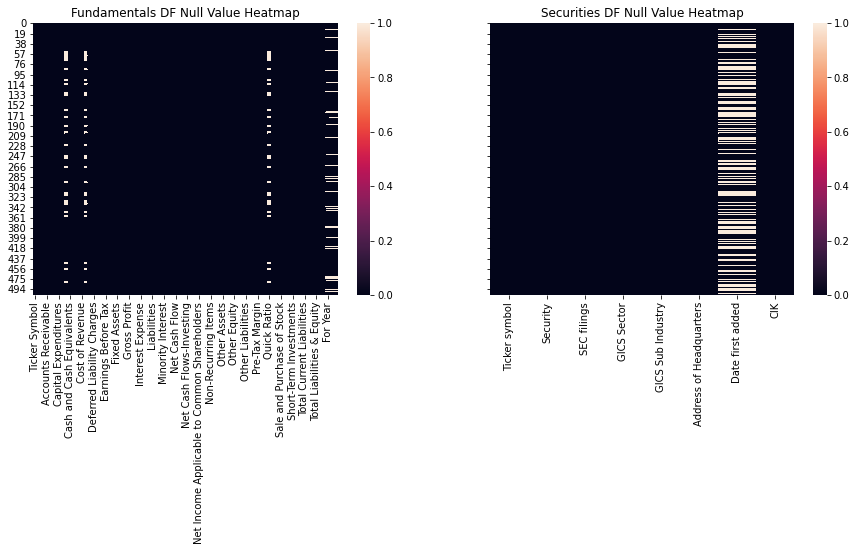

In [14]:
f, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)

axs[0] = sns.heatmap(fundamentals.isna(), ax=axs[0])
axs[0].set_title('Fundamentals DF Null Value Heatmap')
axs[1] = sns.heatmap(securities.isna(), ax=axs[1])
axs[1].set_title('Securities DF Null Value Heatmap')
plt.show()

In [15]:
check_nulls(DFs)

Any Null Values?
fundamentals --> Cash Ratio --> True
fundamentals --> Current Ratio --> True
fundamentals --> Quick Ratio --> True
fundamentals --> For Year --> True
fundamentals --> Earnings Per Share --> True
fundamentals --> Estimated Shares Outstanding --> True
securities --> Date first added --> True


In [16]:
percent_missing = securities['Date first added'].isnull().sum() * 100 / len(securities['Date first added'])
percent_missing

39.20792079207921

#### <span id='drop'>Drop Null Values</span>

In this project, searching for the missing values is more than likely possible, however, due to time constraints on the project, I will drop the rows with missing data seeing that it is less than 30% missing.

In [17]:
securities_nonull = securities.dropna(axis='columns')
fundamentals_nonull = fundamentals.dropna()

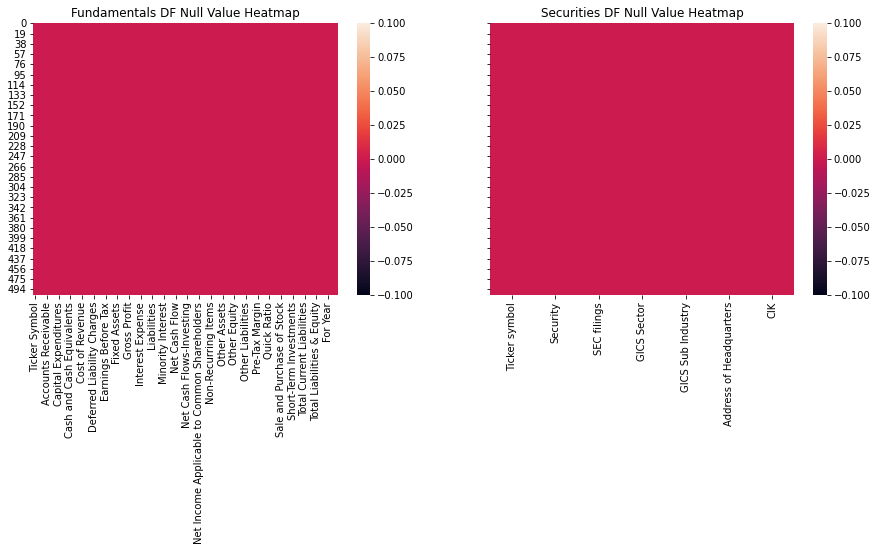

In [18]:
f, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)

axs[0] = sns.heatmap(fundamentals_nonull.isna(), ax=axs[0])
axs[0].set_title('Fundamentals DF Null Value Heatmap')
axs[1] = sns.heatmap(securities_nonull.isna(), ax=axs[1])
axs[1].set_title('Securities DF Null Value Heatmap')
plt.show()

## <span id='explore'>Exploratory Data Analysis</span>

Text(0.5, 1.0, 'Open Prices for WLTW with Split')

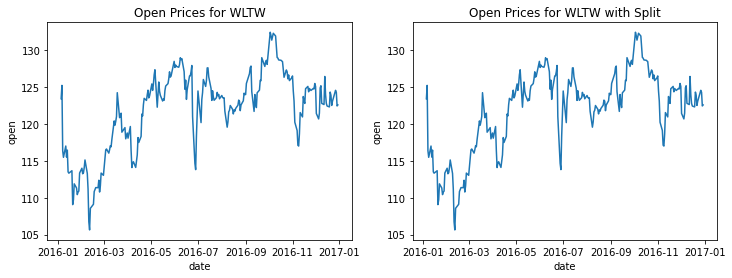

In [19]:
# graph price vs price-split
f, axs = plt.subplots(1,2, figsize=(12,4))

axs[0] = sns.lineplot(data=prices.loc[prices['symbol'] == 'WLTW',:], x="date", y="open", ax=axs[0])
axs[0].set_title('Open Prices for WLTW')

axs[1] = sns.lineplot(data=prices_split.loc[prices_split['symbol'] == 'WLTW',:], x="date", y="open", ax=axs[1])
axs[1].set_title('Open Prices for WLTW with Split')

There is no visual difference in prices vs prices-split for WLTW but that may only be because the stock has never split. Because the prices-split data makes adjustments for when the stocks split, we will use the prices split dataset as our main dataset. 

#### <span id='sma'>Create sma column</span>

In [54]:
# copy the prices_split DF to keep original untouched
main = prices_split.copy()

smas = [5,50,100]

# select one symbol at a time, compute SMA, merge it into main df, repeat
for sma in smas:
    for symbol in main.symbol.unique():
        temps = main.loc[main['symbol']==symbol,['close']].apply(lambda x: x.rolling(window=sma).mean())
        temps.rename(columns={'close':'MA_{}'.format(sma)}, inplace=True )
        main.loc[main['symbol']==symbol,['MA_{}'.format(sma)]] = temps

#### <span id='ema'>Create Ema column</span>

In [61]:
emas = [0.5,0.75]
# emas = ['1 day']

# select one symbol at a time, compute SMA, merge it into main df, repeat
for ema in emas:
    for symbol in main.symbol.unique():
        temps = main.loc[main['symbol']==symbol,['close']].apply(lambda x: x.ewm(com=ema).mean())
        temps.rename(columns={'close':'EMA_{}'.format(ema)}, inplace=True )
        main.loc[main['symbol']==symbol,['EMA_{}'.format(ema)]] = temps

In [62]:
main.tail()

,date,symbol,open,close,low,high,volume,MA_5,MA_50,MA_100,EMA_5,EMA_50,EMA_100,EMA_0.5,EMA_0.75
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,102.649999,105.7964,117.0272,103.055891,113.378068,112.905260,103.241260,103.218137
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,43.649999,38.1438,34.1657,42.802658,33.739105,30.958173,43.033609,43.068465
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,53.570000,50.7964,51.0757,52.743518,50.052398,48.374666,53.548654,53.550210
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,44.540000,42.7918,43.7021,44.050054,43.022487,41.846916,45.154789,45.058259
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0,54.386001,53.1420,52.1782,54.200127,52.371535,52.019660,53.753405,53.799028


#### <span id='rsi'>Create RSI column</span>

In [63]:
n = 14
def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

In [64]:
## CREATE RSI INDICATOR

# select one symbol at a time, compute SMA, merge it into main df, repeat
for ema in emas:
    for symbol in main.symbol.unique():
        temps = main.loc[main['symbol']==symbol,['close']].apply(lambda x: x.ewm(com=ema).mean())
        temps.rename(columns={'close':'EMA_{}'.format(ema)}, inplace=True )
        main.loc[main['symbol']==symbol,['EMA_{}'.format(ema)]] = temps




main['change'] = main['close'].diff()
main['gain'] = main.change.mask(main.change < 0, 0.0)
main['loss'] = -main.change.mask(main.change > 0, -0.0)
main['avg_gain'] = rma(main.gain[n+1:].to_numpy(), n, np.nansum(main.gain.to_numpy()[:n+1])/n)
main['avg_loss'] = rma(main.loss[n+1:].to_numpy(), n, np.nansum(main.loss.to_numpy()[:n+1])/n)

main['rs'] = main.avg_gain / main.avg_loss
main['rsi_14'] = 100 - (100 / (1 + main.rs))

<ipython-input-63-6f8b93a523f3>:5: RuntimeWarning: invalid value encountered in true_divide
  return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]


In [65]:
main.head()

,date,symbol,open,close,low,high,volume,MA_5,MA_50,MA_100,...,EMA_100,EMA_0.5,EMA_0.75,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,NaN,NaN,NaN,...,125.839996,125.839996,125.839996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,NaN,NaN,NaN,...,122.899845,121.445001,121.738001,-5.859993,0.000000,5.859993,NaN,NaN,NaN,NaN
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,NaN,NaN,NaN,...,120.231507,116.948460,117.527720,-5.030006,0.000000,5.030006,NaN,NaN,NaN,NaN
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,NaN,NaN,NaN,...,119.319222,116.726751,116.990915,1.670006,1.670006,0.000000,NaN,NaN,NaN,NaN
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,119.508,NaN,NaN,...,118.437277,115.550745,115.819166,-1.650002,0.000000,1.650002,NaN,NaN,NaN,NaN


#### <span id='visualize'>Visualize new columns against the prices</span>

Text(0.5, 1.0, 'WLTW Price VS Multiple Technical Indicators')

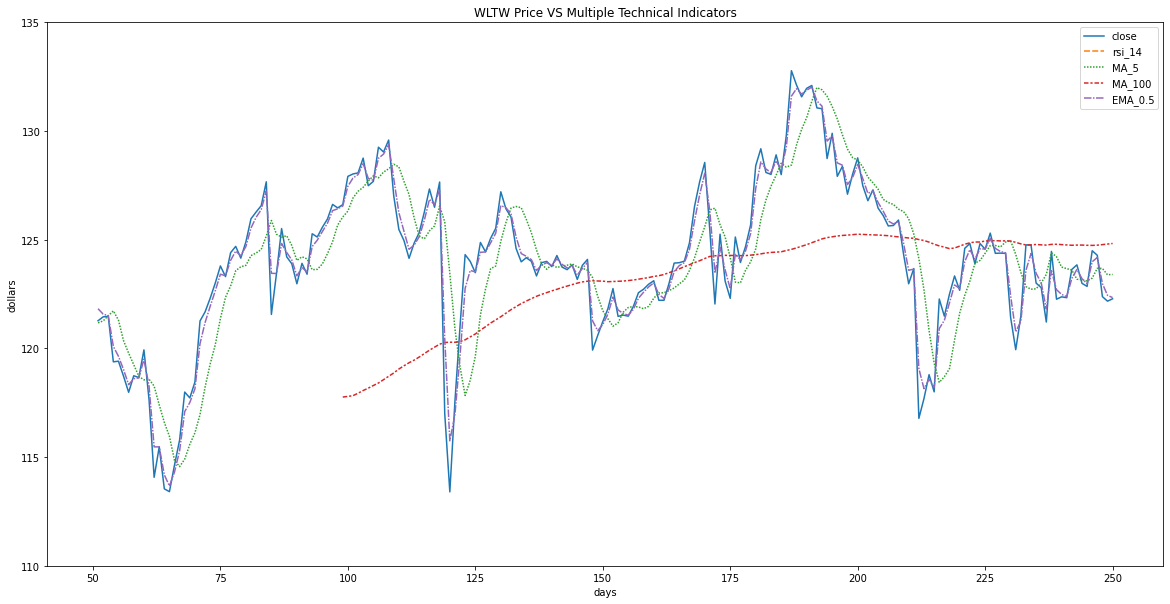

In [110]:
plt.figure(figsize=(20,10))
plt.ylim(110, 135)
sns.lineplot(data=main.loc[main['symbol']=='WLTW',['close','rsi_14','MA_5','MA_100','EMA_0.5']].iloc[-200:])
plt.xlabel('days')
plt.ylabel('dollars')
plt.title('WLTW Price VS Multiple Technical Indicators')

<AxesSubplot:>

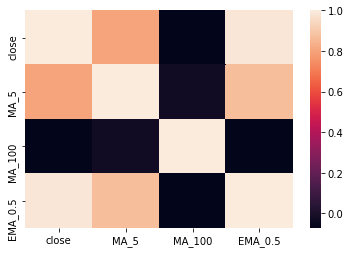

In [116]:
sns.heatmap(main.loc[main['symbol']=='WLTW',['close','MA_5','MA_100','EMA_0.5']].iloc[-200:].corr())